In [1]:
#importing necessary libraries
import numpy as np #for array transformation
from sklearn.model_selection import train_test_split #for splitting data into test, train and validation
from tensorflow.keras.models import Sequential # using Sequential model for FCN
from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D #for diff layer in CNN
from tensorflow.keras.datasets import mnist #for loading mnist dataset
from tensorflow.keras.utils import to_categorical #for one hot encoding

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


From above train and test shape, we can understand that the total number of mnist dataset is 70000 out of which 10000 has been reserved for testing the model and 60000 are to used to train and validate the model

In [4]:
#normarlising the training data from 0-255 to 0-1
X_train=X_train/255. # divinding by 255 as mnist is a grayscale image dataset and each image pixel value ranges from 0-255
X_test=X_test/255.


In [5]:
#one hot encoding of target class
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

num_classes = Y_test.shape[1]#getting the number of classes

Y_train.shape

(60000, 10)

# Formating data for Deep Learning 

In [6]:
X_train=np.expand_dims(X_train,3)#since deep learning requires 3 dimension for each image to process it
X_test=np.expand_dims(X_test,3)

input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])#getting the shape of image

#forcing the precision of pixel values to be 32 bit
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In above cell, following transformation is being done
1. expanding each image dimension from 2 to 3 i.e from 28*28 to 28*28*1
2. getting the shape of the image (28*28*1) from X_train which now has shape 60000*28*28*1
3. Forcing the precision of each image from 8 bit to 32 bit i.e similar to an RGB image

In [7]:
#splitting training data into train and validation datasets

X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [8]:
print(X_val.shape)
print(Y_val.shape)


(18000, 28, 28, 1)
(18000, 10)


# Defining Deep CNN Model for MNIST dataset for various AF

In [9]:
activation_func=['relu','tanh','elu']
history=[]
scores=[]
predictions=[]
for af in activation_func:
    model_loc= Sequential()#using sequential function to define continuous neural network
    #using 2D 3*3 32 convolutional filters with padding, stride=1 and activation function from AF list
    model_loc.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same' , input_shape = input_shape, activation = af))
    model_loc.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same', activation = af))
    #using MAX pooling of 2*2 to reduce the size of the image
    model_loc.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
    #again using 2D 3*3 64 convolutional filters with padding, stride=1 and activation function from AF list
    model_loc.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = af))
    model_loc.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = af))
    #using MAX pooling of 2*2 to reduce the size of the image
    model_loc.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
    #flattening the result and applying FCN from here on
    model_loc.add(Flatten())
    model_loc.add(Dense(500, activation=af))
    model_loc.add(Dense(100, activation=af))
    model_loc.add(Dense(num_classes, activation='softmax'))#using softmax activation function for last layer to get probablity of each classes. 
    #compiling model with loss function as categorical crossentropy and optimizer as adam
    model_loc.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #training the model with training dataset and validating with validation dataset for 10 epochs and batch size 200
    history.append(model_loc.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=50,batch_size=200))
    #evaluating model after training
    scores.append(model_loc.evaluate(X_test,Y_test))
    predictions.append(model_loc.predict_classes(X_test))

Epoch 1/50
210/210 [==============================] - 63s 296ms/step - loss: 0.5868 - accuracy: 0.8074 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 2/50
210/210 [==============================] - 64s 304ms/step - loss: 0.0526 - accuracy: 0.9827 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 3/50
210/210 [==============================] - 65s 307ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0476 - val_accuracy: 0.9868
Epoch 4/50
210/210 [==============================] - 66s 316ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0412 - val_accuracy: 0.9885
Epoch 5/50
210/210 [==============================] - 79s 375ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 6/50
210/210 [==============================] - 73s 346ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0443 - val_accuracy: 0.9892
Epoch 7/50
210/210 [==============================] - 73s 347ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0359 - val_ac

C:\Users\kunal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
210/210 [==============================] - 102s 481ms/step - loss: 0.3936 - accuracy: 0.8761 - val_loss: 0.0640 - val_accuracy: 0.9809
Epoch 2/50
210/210 [==============================] - 115s 549ms/step - loss: 0.0482 - accuracy: 0.9857 - val_loss: 0.0510 - val_accuracy: 0.9849
Epoch 3/50
210/210 [==============================] - 109s 518ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 4/50
210/210 [==============================] - 104s 495ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 5/50
210/210 [==============================] - 100s 478ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/50
210/210 [==============================] - 112s 532ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 7/50
210/210 [==============================] - 110s 524ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0370 -

210/210 [==============================] - 67s 317ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0773 - val_accuracy: 0.9804
Epoch 6/50
210/210 [==============================] - 68s 322ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0594 - val_accuracy: 0.9855
Epoch 7/50
210/210 [==============================] - 67s 321ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0605 - val_accuracy: 0.9863
Epoch 8/50
210/210 [==============================] - 67s 320ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0843 - val_accuracy: 0.9814
Epoch 9/50
210/210 [==============================] - 67s 317ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0484 - val_accuracy: 0.9896
Epoch 10/50
210/210 [==============================] - 67s 317ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0747 - val_accuracy: 0.9866
Epoch 11/50
210/210 [==============================] - 67s 317ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0693 - val_accuracy: 0

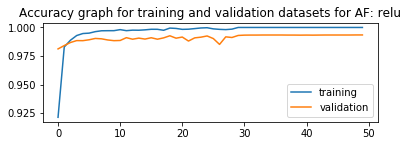

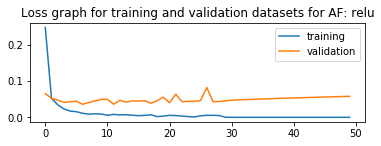

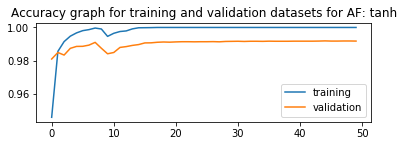

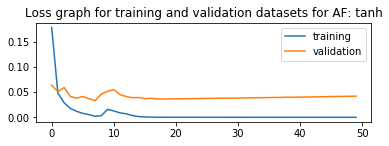

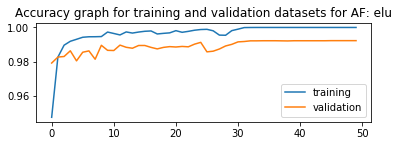

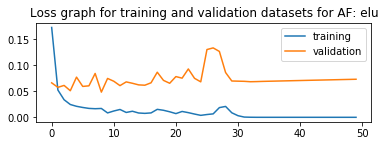

In [11]:
#plotting graph of accuracy for training and validation dataset for each model with diff AF
import matplotlib.pyplot as plt

for i in range(len(history)): 
    #accuracy
    plt.subplot('211')
    plt.plot(history[i].history['accuracy'], label='training')
    plt.plot(history[i].history['val_accuracy'], label='validation')
    plt.legend(loc = 'lower right')
    plt.title("Accuracy graph for training and validation datasets for AF: "+activation_func[i])
    plt.show()
    #loss
    plt.subplot('212')
    plt.plot(history[i].history['loss'], label='training')
    plt.plot(history[i].history['val_loss'], label='validation')
    plt.legend(loc = 'upper right')
    plt.title("Loss graph for training and validation datasets for AF: "+activation_func[i])
    plt.show()



In [12]:
#comparing scores of each model with Diff AF
for i in range(len(scores)):    
    print("Accuracy of model for AF : "+activation_func[i]+" on test dataset is %.2f%%"% (scores[i][1]*100),"")

Accuracy of model for AF : relu on test dataset is 99.36% 
Accuracy of model for AF : tanh on test dataset is 99.49% 
Accuracy of model for AF : elu on test dataset is 99.26% 


In [22]:
predictions

[array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64)]

Metrics for model with AFrelu
F1 score:  0.0007999999999999999




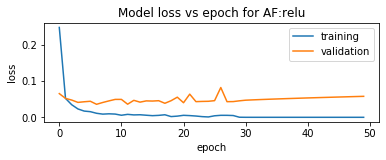

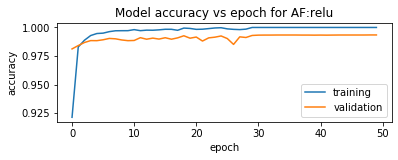

Metrics for model with AFtanh
F1 score:  0.0006




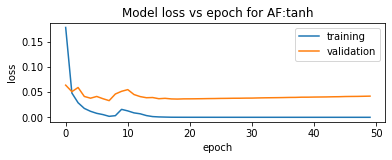

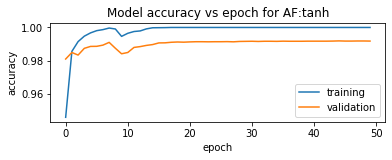

Metrics for model with AFelu
F1 score:  0.0006




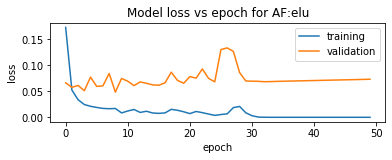

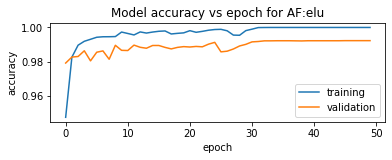

In [33]:
#Metrics related to each model with diff AF
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#Accuracy, Precision, Recall, F1 score and confusion matrix
for i in range(len(predictions)):  
    y_pred=predictions[i]    
    #f1 score
    f1=f1_score(Y_test[:,0],y_pred,average='micro')    
    print("Metrics for model with AF"+activation_func[i])    
    print("F1 score: ",f1)
    print("\n")
    
    #plotting accuracy and loss vs epochs for each model with diff AF
    plt.subplot(211)
    plt.plot(history[i].history['loss'], label='training')
    plt.plot(history[i].history['val_loss'], label='validation')
    plt.title('Model loss vs epoch for AF:'+activation_func[i])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    plt.subplot(212)
    plt.plot(history[i].history['accuracy'], label='training')
    plt.plot(history[i].history['val_accuracy'], label='validation')
    plt.title('Model accuracy vs epoch for AF:'+activation_func[i])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    print("================================================================================================================")